# Sentiment Analysis with Logistic Regression

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline


## Load preprocessed data and generate datasets
We utilize the same preprocessed data file generated by sentiment_analysis_w_lstm.ipynb. After loading the data, we split the data to training, validation and test datasets for training.

In [3]:
df = pd.read_csv('data/pre.csv')

tweets = df['clean_text'].apply(lambda x: ' '.join(eval(x)))
# 0 - negative
# 1 - positive
labels = df['target']

data_train_val, data_test, y_train_val, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)
data_train, data_val, y_train, y_val = train_test_split(data_train_val, y_train_val, test_size=0.2, random_state=42)

# print the distribution and size of each dataset
print("Training Dataset:")
print(y_train.value_counts())
print("Size: {}".format(len(data_train)))

print("\nValidation Dataset:")
print(y_val.value_counts())
print("Size: {}".format(len(data_val)))

print("\nTest Dataset:")
print(y_test.value_counts())
print("Size: {}".format(len(data_test)))

# print samples from data_train and y_train
print(data_train[:5])
print(y_train[:5])


Training Dataset:
target
0    510871
1    510581
Name: count, dtype: int64
Size: 1021452

Validation Dataset:
target
0    128114
1    127249
Name: count, dtype: int64
Size: 255363

Test Dataset:
target
1    159914
0    159290
Name: count, dtype: int64
Size: 319204
180755     i hear tapping on my window like human finger ...
1483820    back to planning my road trip home i think the...
1228707    it a beeautiful first day of june my bday is o...
1301205                                      is in charlotte
546314     yummy sound like a plan but i m probably not n...
Name: clean_text, dtype: object
180755     0
1483820    1
1228707    1
1301205    1
546314     0
Name: target, dtype: int64


## Hyperparameter tuning 
### 1. Use GridSearchCV to tune hyperparameter

In [ ]:

pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'], 
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)], 
    'tfidfvectorizer__max_features': [20000, None]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_train, y_train)

y_pred = grid_search.predict(data_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")

### 2. Use for loops to tune hyperparameter
2.1 Evaluate the Logistic Regression model with 20K features and different maximum n-gram size

Iteration with max ngram:  1
Accuracy: 0.7971984978246652
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80    128114
           1       0.79      0.81      0.80    127249

    accuracy                           0.80    255363
   macro avg       0.80      0.80      0.80    255363
weighted avg       0.80      0.80      0.80    255363

Iteration with max ngram:  2
Accuracy: 0.8124982867525836
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81    128114
           1       0.81      0.82      0.81    127249

    accuracy                           0.81    255363
   macro avg       0.81      0.81      0.81    255363
weighted avg       0.81      0.81      0.81    255363

Iteration with max ngram:  3
Accuracy: 0.8124043028943112
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81  

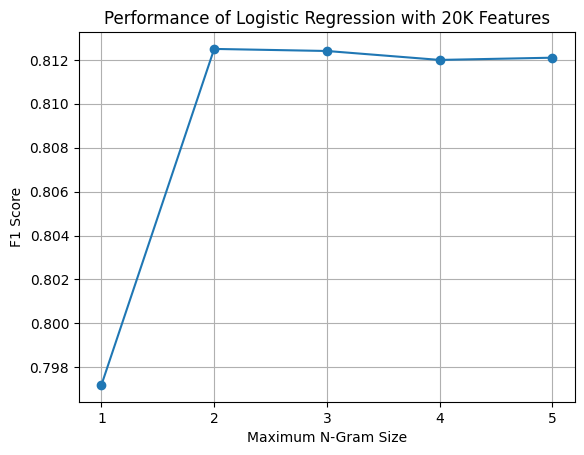

In [8]:
max_ngrams = list(range(1, 6))
accuracy_scores = []

for n in max_ngrams:
    tfidf_vectorizer = TfidfVectorizer(
        ngram_range=(1, n),
        sublinear_tf=True,
        smooth_idf=True,
        max_features=20000,
    )

    X_train = tfidf_vectorizer.fit_transform(data_train)
    X_val = tfidf_vectorizer.transform(data_val)

    model = LogisticRegression(max_iter=300).fit(X_train, y_train)
    y_pred = model.predict(X_val)

    curr_accuracy_score = accuracy_score(y_val, y_pred)
    accuracy_scores.append(curr_accuracy_score)
    print("Iteration with max ngram: ", n)
    print("Accuracy:", curr_accuracy_score)
    print("Classification Report:\n", classification_report(y_val, y_pred))

# Plot the performance of each n-gram size
plt.plot(max_ngrams, accuracy_scores, marker='o')
plt.title('Performance of Logistic Regression with 20K Features')
plt.xlabel('Maximum N-Gram Size')
plt.ylabel('F1 Score')
plt.xticks(max_ngrams)
plt.grid(True)
plt.show()

2.3 Evaluate the Logistic Regression model with all features and different maximum n-gram size

Iteration with max ngram:  1
Accuracy: 0.7976919130805951
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80    128114
           1       0.79      0.81      0.80    127249

    accuracy                           0.80    255363
   macro avg       0.80      0.80      0.80    255363
weighted avg       0.80      0.80      0.80    255363

Iteration with max ngram:  2
Accuracy: 0.8193826043710326
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82    128114
           1       0.82      0.82      0.82    127249

    accuracy                           0.82    255363
   macro avg       0.82      0.82      0.82    255363
weighted avg       0.82      0.82      0.82    255363

Iteration with max ngram:  3
Accuracy: 0.8197781197745954
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82  

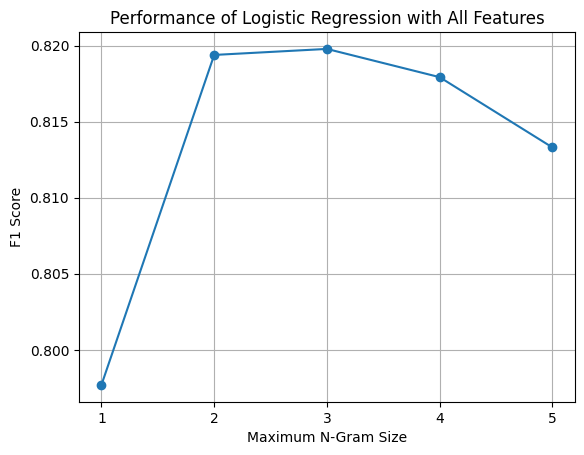

In [9]:
max_ngrams = list(range(1, 6))
accuracy_scores = []

for n in max_ngrams:
    tfidf_vectorizer = TfidfVectorizer(
        ngram_range=(1, n),
        sublinear_tf=True,
        smooth_idf=True,
    )

    X_train = tfidf_vectorizer.fit_transform(data_train)
    X_val = tfidf_vectorizer.transform(data_val)

    model = LogisticRegression(max_iter=300).fit(X_train, y_train)
    y_pred = model.predict(X_val)

    curr_accuracy_score = accuracy_score(y_val, y_pred)
    accuracy_scores.append(curr_accuracy_score)
    print("Iteration with max ngram: ", n)
    print("Accuracy:", curr_accuracy_score)
    print("Classification Report:\n", classification_report(y_val, y_pred))

# Plot the performance of each n-gram size
plt.plot(max_ngrams, accuracy_scores, marker='o')
plt.title('Performance of Logistic Regression with All Features')
plt.xlabel('Maximum N-Gram Size')
plt.ylabel('F1 Score')
plt.xticks(max_ngrams)
plt.grid(True)
plt.show()

## Evaluate the performance on the unseen test dataset

In [10]:
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    sublinear_tf=True,
    smooth_idf=True,
)

X_train = tfidf_vectorizer.fit_transform(data_train)
X_test = tfidf_vectorizer.transform(data_test)

model = LogisticRegression(max_iter=300).fit(X_train, y_train)
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy: 0.8200805754313856
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82    159290
           1       0.83      0.81      0.82    159914

    accuracy                           0.82    319204
   macro avg       0.82      0.82      0.82    319204
weighted avg       0.82      0.82      0.82    319204



## Predict the sentiment of tweets from Elon Musk that has known to have influenced the price

In [11]:
elon_musk_tweets = [
  'You can now buy a Tesla with bitcoin',
  'Tesla would trial run accepting DOGE for merchandise',
  'Tesla buys $1.5 billion in bitcoin https://cnb.cx/3pWs5ci',
  'Tesla would no longer accept BTC as payment',
  'Tesla will make some merch buyable with Doge & see how it goes',
  'Doge',
  'U r welcome',
  'Working with Doge devs to improve system transaction efficiency. Potentially promising',
  'Important to support',
  'Tesla has suspended vehicle purchases using Bitcoin. We are concerned about rapidly increasing use of fossil fuels for Bitcoin mining and transactions, especially coal, which has the worst emissions of any fuel. Cryptocurrency is a good idea on many levels and we believe it has a promising future, but this cannot come at great cost to the environment. Tesla will not be selling any Bitcoin and we intend to use it for transactions as soon as mining transitions to more sustainable energy. We are also looking at other cryptocurrencies that use <1% of Bitcoin\'s energy/transaction.'
]
X_test = tfidf_vectorizer.transform(elon_musk_tweets)
pred = model.predict(X_test)

labelIDToStr = {
        0: "negative",
        1: "positive"
    }
for i, tweet in enumerate(elon_musk_tweets):
  print('['+labelIDToStr[pred[i]]+']', tweet)

[positive] You can now buy a Tesla with bitcoin
[positive] Tesla would trial run accepting DOGE for merchandise
[positive] Tesla buys $1.5 billion in bitcoin https://cnb.cx/3pWs5ci
[negative] Tesla would no longer accept BTC as payment
[positive] Tesla will make some merch buyable with Doge & see how it goes
[positive] Doge
[positive] U r welcome
[positive] Working with Doge devs to improve system transaction efficiency. Potentially promising
[positive] Important to support
[negative] Tesla has suspended vehicle purchases using Bitcoin. We are concerned about rapidly increasing use of fossil fuels for Bitcoin mining and transactions, especially coal, which has the worst emissions of any fuel. Cryptocurrency is a good idea on many levels and we believe it has a promising future, but this cannot come at great cost to the environment. Tesla will not be selling any Bitcoin and we intend to use it for transactions as soon as mining transitions to more sustainable energy. We are also looking

## Evaluate the performance on the test dataset using VADER directly

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def get_sentiment_score_and_label(text):
  # VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool
  # that is specifically attuned to sentiments expressed in social media.
  analyzer = SentimentIntensityAnalyzer()

  # Analyze sentiment
  scores = analyzer.polarity_scores(text)

  score = scores['compound']
  # positive sentiment
  if score >= 0:
    return 1
  else:
    return 0

df['target-vader'] = df['text'].apply(get_sentiment_score_and_label)
print("Accuracy:", accuracy_score(y_test, df['target-vader']))
print("Classification Report:\n", classification_report(y_test, df['target-vader']))

Accuracy: 0.6445991719984946
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.38      0.52    119353
           4       0.60      0.90      0.72    119777

    accuracy                           0.64    239130
   macro avg       0.70      0.64      0.62    239130
weighted avg       0.70      0.64      0.62    239130

